## chandan shah
080bct023

In [35]:
import numpy as np
import matplotlib.pyplot as plt 
x_vals=[2,3,4,5,6]
y_vals=[3,6,5,7,8]
h=np.diff(x_vals)
y=np.diff(y_vals)
n=len(x_vals)-1
row=n-1
column=len(x_vals)
m=column
A = np.zeros((row, column))
B = np.zeros((row))
M = np.zeros(column)




In [36]:
for i in range (0,n-1):
    (A[i,i]),(A[i,i+1]),(A[i,i+2])=h[i],2*h[i]+h[i+1],h[i+1]
    B[i]=6*(y[i+1]/h[i+1]-y[i]/h[i])

M[1:n] = np.linalg.solve(A[:, 1:n], B)
xp=np.linspace(min(x_vals),max(x_vals),100)
i=np.clip(np.searchsorted(x_vals,xp)-1,0,n-1)


In [37]:
def func(xp,h,M,x_vals,y_vals,i):
    return(M[i+1]/6*h[i]*(xp-x_vals[i])**3-M[i]/6*h[i]*(xp-x_vals[i+1])**3+(y_vals[i+1]/h[i]-M[i+1]*h[i]/6)*(xp-x_vals[i])-(y_vals[i]/h[i]-M[i]*h[i]/6)*(xp-x_vals[i+1]))


In [38]:
yp=np.zeros(100)
for j in range(0,100):
    yp[j]=func(xp[j],h,M,x_vals,y_vals,i[j])

  

/var/folders/wk/485j8zms4wx1g2b_h5h_gxn80000gn/T/ipykernel_11137/4266384691.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


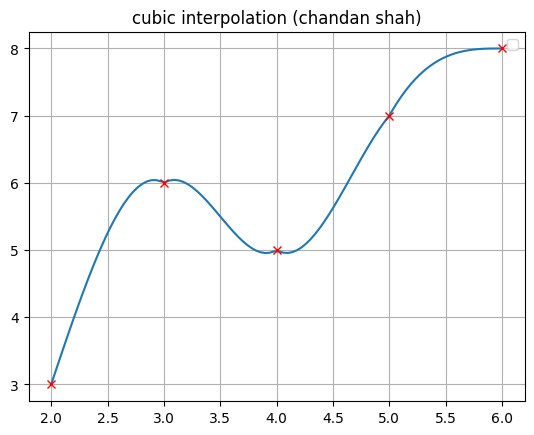

In [39]:
plt.title('cubic interpolation (chandan shah)')
plt.plot(xp,yp)
plt.plot(x_vals,y_vals,'rx')
plt.legend()
plt.grid(True)

# systems of ODE using rk4

In [40]:



def f1(x, y, z):
    return z

def f2(x, y, z):
    return x + y**2 + z * np.sin(x)

def rk4(x0, y0, z0, xn, n):
    h = (xn - x0) / n
    x, y, z = x0, y0, z0
    
    x_values = [x]
    y_values = [y]
    z_values = [z]

    for _ in range(n):
        k1 = h * f1(x, y, z)
        l1 = h * f2(x, y, z)

        k2 = h * f1(x + h / 2, y + k1 / 2, z + l1 / 2)
        l2 = h * f2(x + h / 2, y + k1 / 2, z + l1 / 2)

        k3 = h * f1(x + h / 2, y + k2 / 2, z + l2 / 2)
        l3 = h * f2(x + h / 2, y + k2 / 2, z + l2 / 2)

        k4 = h * f1(x + h, y + k3, z + l3)
        l4 = h * f2(x + h, y + k3, z + l3)

        dy = (k1 + 2*k2 + 2*k3 + k4) / 6
        dz = (l1 + 2*l2 + 2*l3 + l4) / 6

        # Update values
        x += h
        y += dy
        z += dz

        # Store the results
        x_values.append(x)
        y_values.append(y)
        z_values.append(z)

    return x_values, y_values, z_values

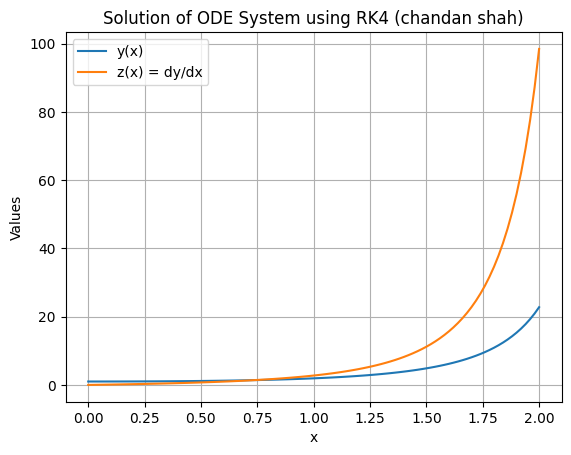

In [41]:
x0 = 0
y0 = 1
z0 = 0
xn = 2
n = 100

x_vals, y_vals, z_vals = rk4(x0, y0, z0, xn, n)


plt.plot(x_vals, y_vals, label='y(x)')
plt.plot(x_vals, z_vals, label='z(x) = dy/dx')
plt.xlabel('x')
plt.ylabel('Values')
plt.title('Solution of ODE System using RK4 (chandan shah)')
plt.legend()
plt.grid(True)
plt.show()